Unit 9, Lecture 2
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Mar 22  2016

In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, erf
import seaborn
seaborn.set_context("talk")
#seaborn.set_style("white")
import scipy.optimize

Student's $t$-Test
====

I open up a cash4gold store and people bring me their jewlery. I know the probability distribution for gold melting is normal with mean 1060 $^{\circ}$C. I do not know the standard deviation. Someone brings in 6 samples and they melt at 1035, 1050, 1020, 1055, and 1046 $^{\circ}$C. Should I reject the null hpyothesis, that these are gold?

#### Logical Steps: 

1. Assuming the null hypothesis, compute our uncertainty in the true mean confidence interval
2. We happen to have the true mean, so then we see how big the confidence interval has to be to include it
3. How big our confidence interval is, tells is how likely the underlying null hypothesis is

In [2]:
samples = np.array([1035., 1050., 1020., 1055., 1046.])
sigma = sqrt(np.var(samples, ddof=1))
sample_mean = np.mean(samples)
true_mean = 1060.

print(sigma, sample_mean, true_mean)

T = (sample_mean - true_mean) / (sigma / sqrt(len(samples)))
print(T)

13.9534941860453 1041.2 1060.0
-3.01272766638


Now we have a $T$ and we know $P(T)$. However, just like the $zM$ test, we can't compute $P(T)$ since that's a single point and we're using a continuous distribution. So instead, we build an interval and see how big it must be to catch that $T$. 

Specifically, we want to find $p = \int_{-T}^T p(t)\,dt$

In [3]:
import scipy.stats

print('T = ', T)

p = scipy.stats.t.cdf(T, len(samples)) # The integral from -T to T
print (p, 'Is the single sided p-value')

p = 1 - (scipy.stats.t.cdf(-T, len(samples)) - scipy.stats.t.cdf(T, len(samples))) # The integral from -T to T
print (p, 'Is the double sided p-value')

print ('notice, just using 2 * the single-sided value gives the same answer')

T =  -3.01272766638
0.0148313200979 Is the single sided p-value
0.0296626401959 Is the double sided p-value
notice, just using 2 * the single-sided value gives the same answer


What if accidentally reverse our T-value?
---

In [4]:
T = (true_mean - sample_mean) / (sigma / sqrt(len(samples)))
print (T)

p = (scipy.stats.t.cdf(T, len(samples)))
print ('CDF gives: ', p)
print ('Recognize that includes from -infty up to a positive T, so we need to find the complementary area')

print (1 - p, 'Is the single sided p-value')
print ((1 - p) * 2, 'Is the double sided p-value')

3.01272766638
CDF gives:  0.985168679902
Recognize that includes from -infty up to a positive T, so we need to find the complementary area
0.0148313200979 Is the single sided p-value
0.0296626401959 Is the double sided p-value


Summary of Methods for Comparing Single Measurement with Normal Population
====

$zM$ Test
====

**Data Type:** Measurements and Ranks

**Compares:** A sample vs a single normally distributed population

**Null Hypothesis:** The sample came from the population

**Conditions:** Standard deviation of population is known

**Related Test 1:** Student's $t$-test, which is used when the standard deviation is not known

**Python:** Integrate an interval with a Z-statistic and `erf` or `scipt.stats.norm.cdf`

Student's $t$-test
====

**Data Type:** Measurements and Ranks

**Compares:** A sample vs a single normally distributed population

**Null Hypothesis:** The sample came from the population

**Conditions:** Standard deviation of population is not known

**Related Test 1:** $zM$ test, which is used when standard deviation is known

**Python:** Integrate an interval with a T-stastic and `scipt.stats.t.cdf`

Detour: Parametric vs. Nonparametric Stastics
====

**Parametric Statistics:** What we've seen before, where we do statistics by assuming the data follows some underlying probability distribution (like normal distribution).

**Nonparametric Statistics:** We do statistics without assuming an equation form for the underlying probability distribution

Nonparametric statistics are secret and not widely taught because people belive they are challenging to understand. This is true, but I don't think undergraduates completely understand probability measure spaces but it doesn't stop us from using them.

*From here onwards, most tests will not assume normality and are nonparametric. You won't find these tests in most traditional statistics textbooks*

To do nonparametric statistics, one of the underlying principles is converting measurements into rankings.

In [5]:
import scipy.stats

d = np.random.rand(10)
print (d)
print (scipy.stats.rankdata(d))

[ 0.43829565  0.7765349   0.77310972  0.45943712  0.88361347  0.77653251
  0.5720076   0.39194721  0.64076874  0.3196812 ]
[  3.   9.   7.   4.  10.   8.   5.   2.   6.   1.]


Nonparametric Methods for Comparing Sets of Measurements
====

Wilcoxon's Sum of Ranks Test
====

**Data Type:** Ranks

**Compares:** Two sets of measurements. 

**Null Hypothesis:** The two sets of measurements are from the same distribution

**Conditions:** Unmatched measurements. Unmatched the measurements aren't in pairs and you don't necessarily have the same number

**Related Test 1:** Wilcoxon's Signed Ranks Test for matched data measuring one thing (i.e, temperature)

**Related Test 2:** Spearman's Correlation Test for matched data measuring two things (i.e., temperature and pressure)

**Python:** `scipy.stats.ranksums`

Example: Were HW 1 and HW 2 from the same distribution?
====

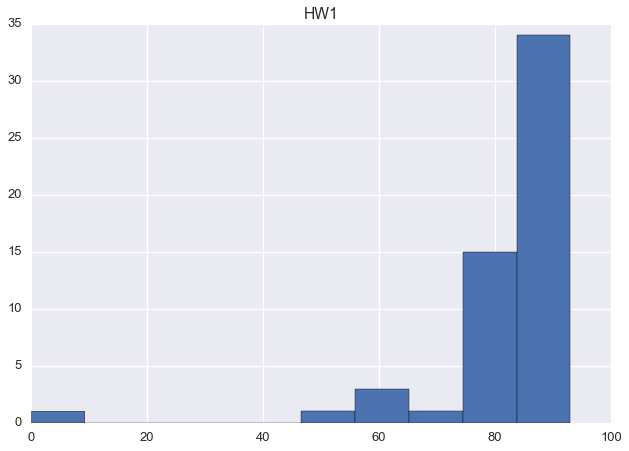

In [7]:
import pandas
data = pandas.read_csv('../grades.csv')
plt.title('HW1')
plt.hist(100 * data['HW1'] / 50) # I'm dividing here to make the grade a percentage
plt.show()

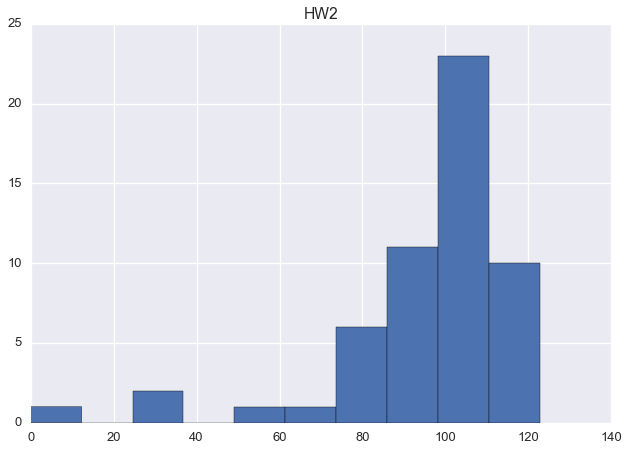

In [8]:
plt.title('HW2')
plt.hist(100 * data['HW2'] / 44) # I'm dividing here to make the grade a percentage
plt.show()

In [9]:
scipy.stats.ranksums(data['HW1'] / 44., data['HW2'] / 50.)# I'm dividing here to make the grade a percentage

RanksumsResult(statistic=3.2162420061920809, pvalue=0.0012988125539926038)

The $p$-value is 0.001, so no they weren't from the same distribution. HW 2 was significantly more difficult.

In [10]:
scipy.stats.ranksums(data['HW6'] / 19., data['HW4'] / 100.)# I'm dividing here to make the grade a percentage

RanksumsResult(statistic=0.40352478702224065, pvalue=0.68656220384069333)

HW 4 and 6 were about the same difficulty. 

Wilcoxon's Signed Rank Test
====

**Data Type:** Ranks

**Compares:** Two sets of measurements

**Null Hypothesis:** The two sets of measurements are from the same distribution

**Conditions:** Measurements are matched. Matched means the data comes in tuples/pairs. More than 6 samples, better to have more than 20.

**Related Test 1:** Wilcoxon's Sum of Ranks Test for unmatched data measuring one thing (i.e, temperature)

**Related Test 2:** Spearman's Correlation Test for matched data measuring two things (i.e., temperature and pressure)


**Python:** `scipy.stats.wilcoxon`

Since we know that the same people are doing the homework, we can make more accuracte comparisons by seeing if the average change in scores between HW 4 and HW 6 was random.

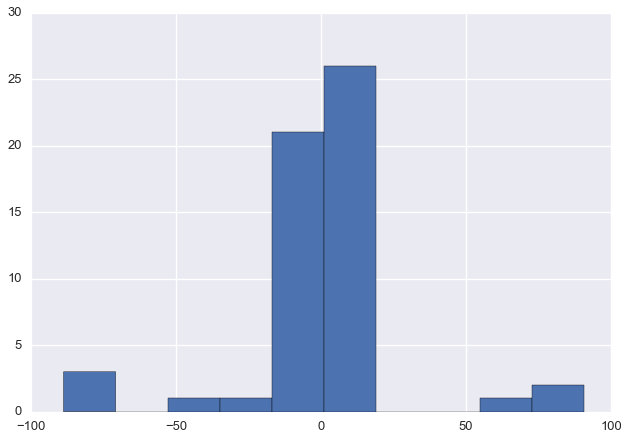

In [11]:
plt.hist(100 * data['HW6'] / 19. - data['HW4'])# I'm dividing here to make the grade a percentage
plt.show()


Notice that we have to make sure these are in the same units, since we're comparing them directly.

In [12]:
scipy.stats.wilcoxon(100 * data['HW6'] / 19., data['HW4'])# I'm dividing here to make the grade a percentage

WilcoxonResult(statistic=663.0, pvalue=0.36997909338233748)

Spearman's Correlation Test
====

**Data Type:** Ranks

**Compares:** Two sets of measurements

**Null Hypothesis:** The two sets of measurements are uncorrelated

**Conditions:** Measurements are matched. Matched means the data comes in tuples/pairs. The measurements are of different things

**Related Test 1:** Wilcoxon's Sum of Ranks Test for unmatched data measuring one thing (i.e, temperature)

**Related Test 2:** Wilcoxon's Signed Ranks Test for matched data measuring one thing (i.e, temperature)

**Python:** `scipy.stats.spearmanr`

Example: Is doing well on homework correlated with doing well on the midterm?
====

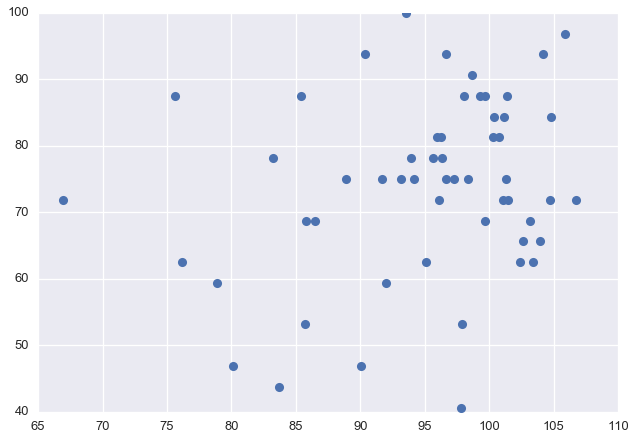

In [13]:
plt.plot(data['HW'], 100 * data['Midterm'] / 32., 'o')# I'm dividing here to make the grade a percentage
plt.show()

In [15]:
scipy.stats.spearmanr(data['HW'], data['Midterm'])

SpearmanrResult(correlation=0.19611245494370425, pvalue=0.15129294960465484)

The $p$-value is slightly higher than $0.05$, so we may say that no there is no correlation. Note also that we didn't have to worry about these being in different units.  For comparison, consider our previous method of using correlation coefficients.

In [16]:
np.corrcoef(data['HW'], data['Midterm'], ddof=1)

array([[ 1.        ,  0.25865924],
       [ 0.25865924,  1.        ]])

Tests For Counts
====

Poisson's Count Test
====

**Data Type:** Count

**Compares:** Count vs a poisson distributed population

**Null Hypothesis:** The number of observations (count) came from the known population

**Conditions:** Less than 40 samples (for computational simplicity)

**Related Test 1:** $zI$ test, for more than 40 samples

**Python:** Construct an interval and integrate using `scipy.stats.poisson.cdf(x, mu=...)` or use `quad`.

Example: Hurricanes per Year
====

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?

We will construct a double-sided interval and see how big it needs to be to catch the value.

In [17]:
print('p-value is', (1 - scipy.stats.poisson.cdf(15, mu=6.3)) * 2)

p-value is 0.00168898616072
